# Машинное обучение. Курс 1. Неделя 4.

In [169]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Логнормальное распределение

Сгенерируем выборку объёма 1000 из стандартного log - нормального распределения (с $\mu=0$ и $\sigma^2=1$):

Мат.ожидание: $e^{{\mu +\sigma ^{2}/2}}$  Дисперсия: $(e^{{\sigma ^{2}}}\!\!-1)e^{{2\mu +\sigma ^{2}}}$

In [170]:
mu, sigma = 0., 1. 
y = np.random.lognormal(mu, sigma, 1000)
#print (y)

Постороим на одном графике гистограмму выборки и нарисуем поверх неё теоретическую плотность распределения случайной величины:

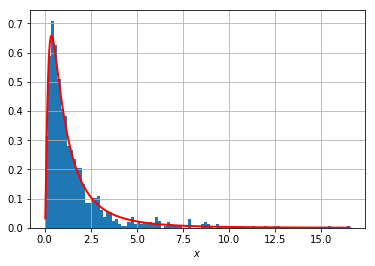

In [171]:
count, bins, ignored = plt.hist(y, 100, normed=True, align='mid') # 100 = количество разбиений 
x = np.linspace(min(bins), max(bins), 1000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))/ (x * sigma * np.sqrt(2 * np.pi)))
plt.plot(x, pdf, linewidth=2, color='r')
plt.axis('tight')
plt.grid()
plt.xlabel('$x$')
plt.show()

Оценим распределение выборочного среднего случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 80) сгенерируем 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних.

Посчитаем параметры нормального распределения (для ЦПТ):

In [172]:
n = 5
mu, sigma = 0., 1.
mu1 = np.exp(mu + sigma**2/2 )
print(mu1)
sigma1 = ((np.exp(sigma**2)-1)*np.exp(2*mu + sigma**2))/n
print(sigma1)

1.6487212707
0.934154854094


In [173]:
n = 5
sample = []
for i in range(1000):
    x = np.random.lognormal(mu, sigma, n)
    sample.append(x.mean())
#print(y)

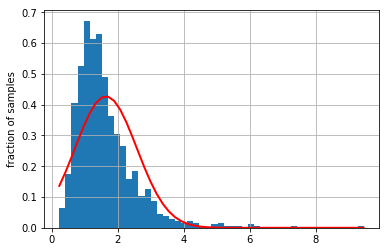

In [174]:
mu1 = 1.6487212707
sigma2 = 0.934154854094
count, bins, ignored = plt.hist(sample, 50, normed=True)
plt.ylabel('fraction of samples')
plt.plot(bins, 1/(sigma2 * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu1)**2 / (2 * sigma2**2) ),linewidth=2, color='r')
plt.grid()
plt.show()

In [175]:
n = 10
sample = []
for i in range(1000):
    x = np.random.lognormal(mu, sigma, n)
    sample.append(x.mean())
#print(sample)

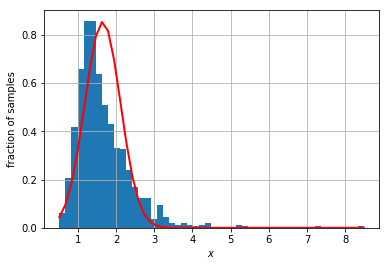

In [176]:
mu1 = 1.6487212707
sigma2 = 0.467077427047
count, bins, ignored = plt.hist(sample, 50, normed = True)
plt.ylabel('fraction of samples')
plt.plot(bins, 1/(sigma2 * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu1)**2 / (2 * sigma2**2) ),linewidth=2, color='r')
plt.grid()
plt.xlabel('$x$')
plt.show()

In [177]:
n = 80
sample = []
for i in range(1000):
    x = np.random.lognormal(mu, sigma, n)
    sample.append(x.mean())
#print(sample)

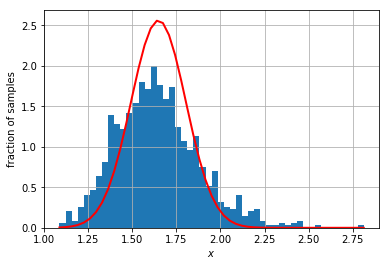

In [178]:
mu1 = 1.6487212707
sigma2 = 0.155692475682
count, bins, ignored = plt.hist(sample, 50, normed=True)
plt.ylabel('fraction of samples')
plt.plot(bins, 1/(sigma2 * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu1)**2 / (2 * sigma2**2) ),linewidth=2, color='r')
plt.grid()
plt.xlabel('$x$')
plt.show()

### Вывод

Исходное распределение не позволяет распределению имеет некоторую антисимметрию, которая не позволяет гистограммам сходится быстро к нормальному распределению. Однако с повышением n (устремлением его в бесконечность), выполнение теоремы - очевидно